In [1]:
from time_series.time_series import TimeSeries
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"
from IPython.display import Image
import matplotlib.pyplot as plt

In [4]:
# # UN-COMMENT THIS BLOCK AND RUN ONLY ONE TIME

#full_df = pd.read_csv('data/bq-results-20231114-034453-1699933544097.csv')
#full_df['timestamp'] = pd.to_datetime(full_df['timestamp']) 
#full_df['timestamp_epoch'] = full_df['timestamp'].astype('int64') // 10**9
#full_df.sort_values(by='timestamp', inplace=True)  
#full_df.to_csv('data/eth_burn.csv', index=False) 



In [2]:
# Read full data
full_df = pd.read_csv('data/eth_burn.csv')
# Limit data to after the merge
full_df = full_df[full_df['timestamp_epoch'] > 1663286400]

full_df['eth_burn'] = full_df['gas_used']/1e9 * full_df['base_fee_per_gas']/1e9
full_df = full_df[['timestamp', 'eth_burn']]

# Moving average of eth_burn (assume 12 sec block times after merge)
full_df['twap_60min'] = full_df['eth_burn'].rolling(int(3600/12)).mean()
full_df['twap_10min'] = full_df['eth_burn'].rolling(int(600/12)).mean()
# Remove nans
full_df.dropna(inplace=True)
full_df.index = full_df['timestamp']


In [3]:
fdfd = pd.to_datetime(full_df.index)
full_df.index = fdfd
dfr = full_df.resample('T').sum()
dfr = dfr.iloc[1379:] #start midnight
dfr['ordinal'] = range(len(dfr))


/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_58412/1259167132.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [309]:
mins = pd.DataFrame()
for i in range(1440):
    mins[i] = dfr[dfr['ordinal'] % 1440 == i]['eth_burn'].mean()
del mins['ordinal']
dfr['average'] = mins.loc['eth_burn']   

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/z_/_h303g014p54_9_tgg6ym4k00000gn/T/ipykernel_5285/3832828768.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

KeyError: 'ordinal'

In [326]:
avgs = mins.T[['eth_burn', 'twap_60min', 'twap_10min']]

In [352]:
dfr.head()

,eth_burn,twap_60min,twap_10min,ordinal,average
timestamp,,,,,
2022-09-17 00:00:00+00:00,0.253630,0.380344,0.290748,0,NaN
2022-09-17 00:01:00+00:00,0.527136,0.379310,0.296541,1,NaN
2022-09-17 00:02:00+00:00,0.796277,0.382215,0.331695,2,NaN
2022-09-17 00:03:00+00:00,0.743922,0.385682,0.368372,3,NaN
2022-09-17 00:04:00+00:00,0.482688,0.381445,0.401432,4,NaN


In [354]:
cols = ['eth_burn', 'twap_60min', 'twap_10min']
cols_diff = [x + "_diff" for x in cols]
res = []
for idx, row in dfr[:].iterrows():
    j = int(row['ordinal'] % 1440)
    #print(j)
    diff = row[cols] - avgs.iloc[j][cols]
    res.append(diff)

In [355]:
diffs = pd.DataFrame(res)

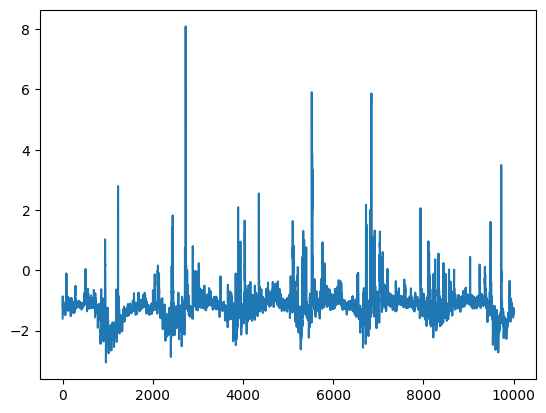

In [357]:
plt.plot(diffs['eth_burn'][:10000])

In [264]:
averages = dict()
for h in range(24):
    for m in range(60):
        sel = (dfr.index.hour == h) & (dfr.index.minute == m)
        tmp = dfr[sel] #(dfr.index.hour == h and dfr.index.minute == m).all()]
        averages[(h,m)] = tmp
        

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To re

In [265]:
averages

{(0,
  0): eth_burn      1.854777
 twap_60min    1.606604
 twap_10min    1.518597
 dtype: float64,
 (0,
  1): eth_burn      1.678219
 twap_60min    1.611847
 twap_10min    1.545093
 dtype: float64,
 (0,
  2): eth_burn      1.663762
 twap_60min    1.613509
 twap_10min    1.562233
 dtype: float64,
 (0,
  3): eth_burn      1.627323
 twap_60min    1.591286
 twap_10min    1.556292
 dtype: float64,
 (0,
  4): eth_burn      1.610486
 twap_60min    1.604992
 twap_10min    1.584813
 dtype: float64,
 (0,
  5): eth_burn      1.586236
 twap_60min    1.596128
 twap_10min    1.587398
 dtype: float64,
 (0,
  6): eth_burn      1.606223
 twap_60min    1.600487
 twap_10min    1.605305
 dtype: float64,
 (0,
  7): eth_burn      1.568219
 twap_60min    1.589394
 twap_10min    1.604687
 dtype: float64,
 (0,
  8): eth_burn      1.585555
 twap_60min    1.593356
 twap_10min    1.622639
 dtype: float64,
 (0,
  9): eth_burn      1.547282
 twap_60min    1.582524
 twap_10min    1.622141
 dtype: float64,
 (0,
  10)

In [5]:
mdf = full_df.iloc[::150, :]  # Downsample to 1 point per 150; ie every 30 mins

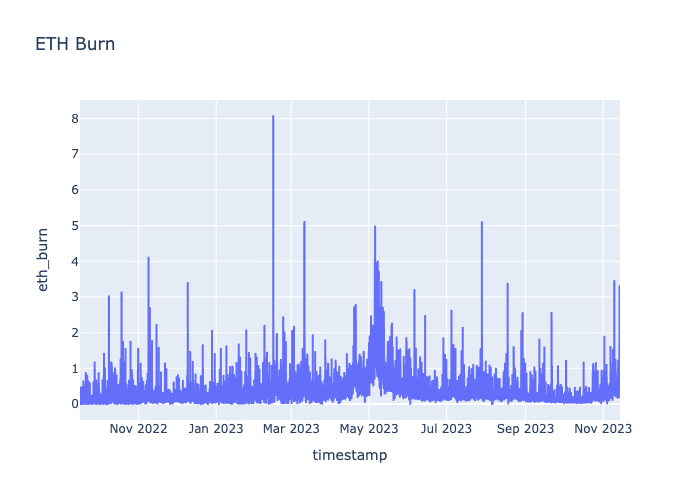

In [5]:
# Plot the data
fig = px.line(df, x='timestamp', y='eth_burn', title='ETH Burn')
fig.show()


/Users/gaga/overlay/siwa/eda/time_series/time_series.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x500 with 0 Axes>

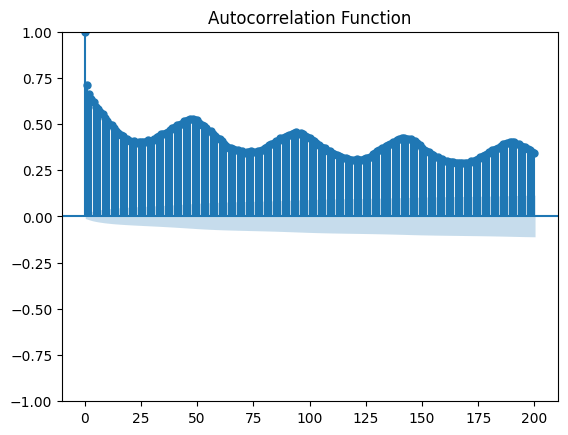

In [16]:
ts = TimeSeries(df, 'timestamp', 'eth_burn')
ts.plot_autocorrelation(lags=200)

In [4]:
# Limit df to last ~10 days (10*48 rows) to visualise better
df_last60 = df.iloc[-10*48:, :]
ts = TimeSeries(df_last60, 'timestamp', 'eth_burn')
decom = ts.decompose(period=48)
ts.plot_decomposition()

NameError: name 'df' is not defined

In [10]:
# Check ADF to see if time series is stationary
series, d = ts.check_stationarity(100)

ADF Statistic: -6.051426051211695
p-value: 1.2748462778142268e-07
Series is stationary.


In [11]:
# Check to see if residual after decomposition is stationary
resid = decom.resid.dropna()
resid = pd.DataFrame(resid)
resid['timestamp'] = resid.index
ts_resid = TimeSeries(pd.DataFrame(resid), 'timestamp', 'resid')
series, d = ts_resid.check_stationarity(100)


ADF Statistic: -9.154161656817081
p-value: 2.6372616534259766e-15
Series is stationary.


Conclusions:

1. ADF test shows that the data is stationary. However, the ADF test is designed to test for a unit root, which is a specific form of non-stationarity. When the ADF test indicates that the time series is stationary, it means that there is no unit root according to the test's criteria. However, this does not necessarily mean that the series has no other forms of non-stationarity, such as seasonality or changing variance.

2. The ACF plot shows a wave like pattern with a period of ~48. Since the data is sampled every 30 mins, this means that there is a daily seaoanlity in the data. This comes across in the decomposition plot as well.

Mean: -0.0045278160786969175, Std: 0.24488803084966504


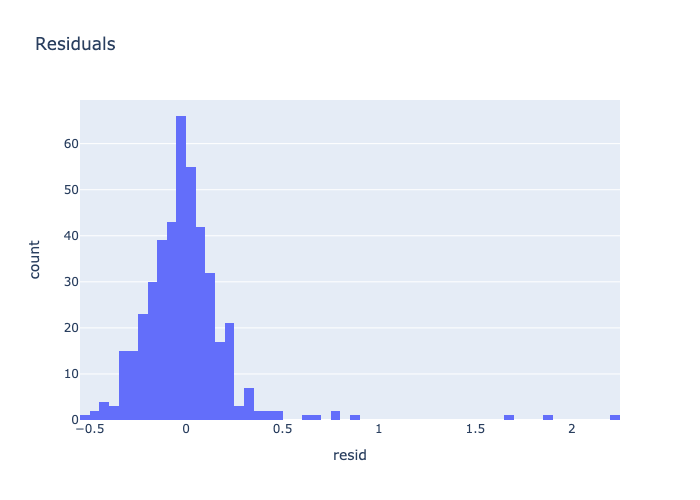

In [12]:
# Calculate mean and std of residuals
mean = resid['resid'].mean()
std = resid['resid'].std()
print(f'Mean: {mean}, Std: {std}')

# Plot hitogram of residuals
fig = px.histogram(resid, x='resid', title='Residuals')
fig.show()

In [102]:
ts_all = TimeSeries(df, 'timestamp', 'eth_burn')
decom = ts_all.decompose(period=48)
resid = decom.resid.dropna()
resid = pd.DataFrame(resid)
resid.reset_index(inplace=True)


/Users/gaga/overlay/siwa/eda/time_series/time_series.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



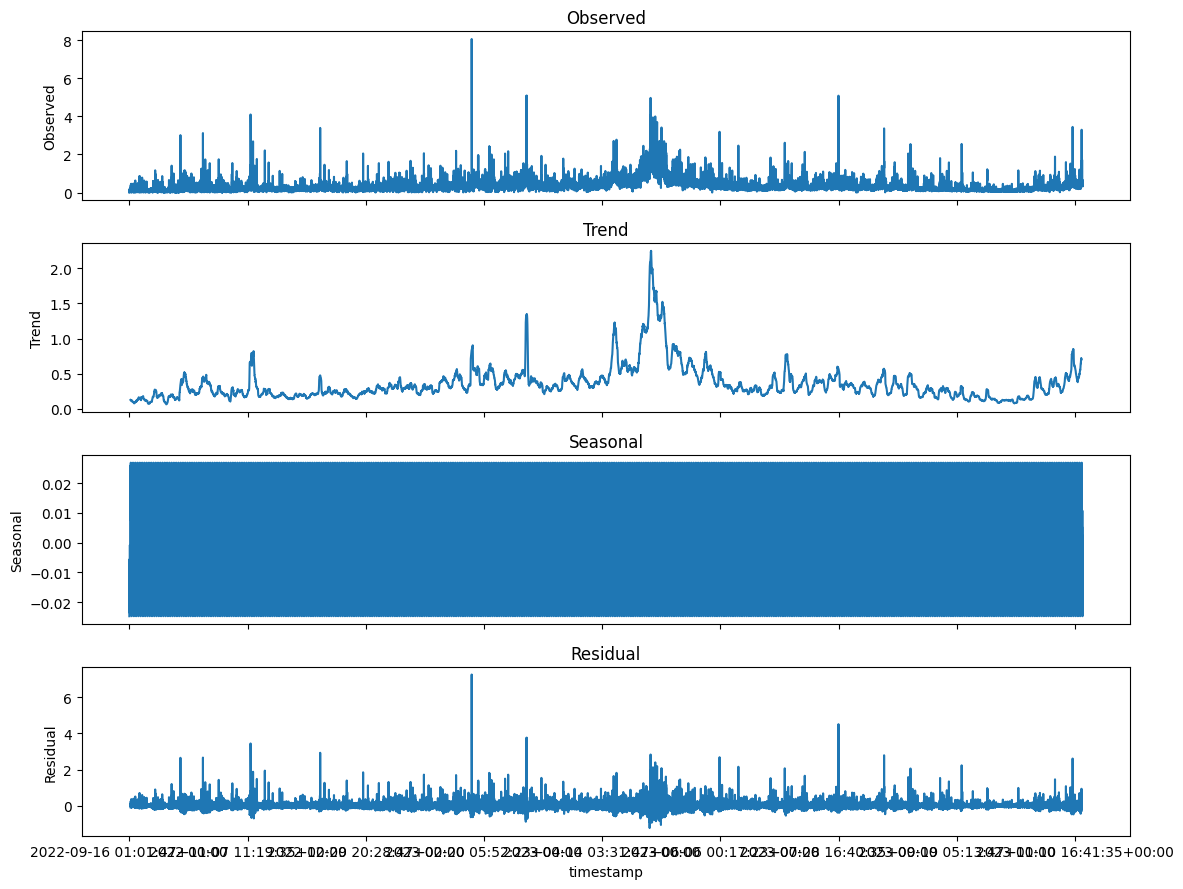

In [322]:
ts_all.plot_decomposition()

In [15]:
def rolling_mean_variance(df, t, col):
    """
    Calculate rolling mean and variance with data manipulation:
    1. Adjust data mean to 0.
    2. Set max value to the absolute of the min value.

    Args:
    df (pandas.DataFrame): Input dataframe.
    t (int): Rolling window size.
    col (str): Column name on which to perform the operation.

    Returns:
    pandas.DataFrame: DataFrame with rolling mean and variance.
    """

    def manipulate_data(window):
        # Adjust the mean to 0
        window_mean = np.mean(window)
        window -= window_mean

        # Set max value to negative of the min value
        min_val = np.min(window)
        window[window >= abs(min_val)] = abs(min_val)

        # Calculate the mean and variance of the manipulated window
        mean_adjusted = np.mean(window)  # should be close to 0
        var_adjusted = np.var(window)
        
        return mean_adjusted, var_adjusted

    # Store the results in lists
    rolling_means = []
    rolling_vars = []

    # Perform the rolling window calculation
    for start in range(len(df) - t + 1):
        end = start + t
        window = df[col][start:end]
        mean_adjusted, var_adjusted = manipulate_data(window)
        rolling_means.append(mean_adjusted)
        rolling_vars.append(var_adjusted)

    # Construct the resulting DataFrame
    result = pd.DataFrame({
        'rolling_mean': rolling_means,
        'rolling_var': rolling_vars
    }, index=df.index[t-1:])

    return result


In [26]:
res = rolling_mean_variance(resid, 48, 'resid')
resid_mean_var = res.join(resid)


In [392]:
def get_delta(point, resid):
    if resid > .5:
        resid = .5
    elif resid < -.5:
        resid = -.5
    #res = resid*10
    res = point * (.03/5)*resid
    #print(res)
    return res#point*resid/(100*3)
    

In [388]:
min(diffs['eth_burn'])

-3.195149316209898

In [153]:
#plt.hist(resid[:]['resid'], bins=100)

In [115]:
(1-.01)*(1+.01)

0.9999

In [ ]:
2510:2610:

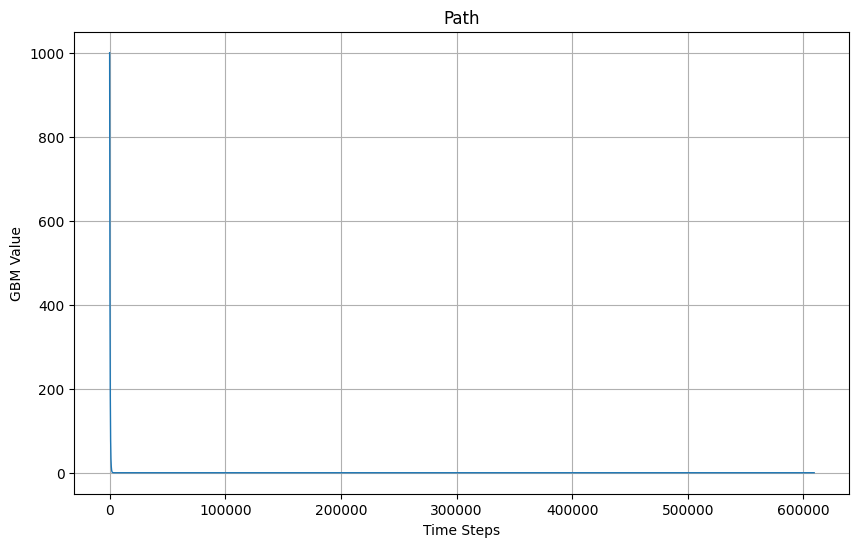

In [393]:
path = [10000]
deltas = [0]
# Iterate through the DataFrame to generate the GBM path
for index, row in diffs[:].iterrows(): 
#for r in resid['resid'] :
    point = path[-1]
    #r = row['resid']
    r = row['eth_burn']
    delta = get_delta(point, r)
    #deltas.append(delta*100)
    #print(point, r, delta, point + delta)
    path.append(point + delta)

# Plot the path
plt.figure(figsize=(10, 6))
plt.plot(path, '-',lw=1)
df2 = pd.DataFrame(resid[2510:2610]['resid'])
df2.index = range(len(df2))
#plt.plot(df2*30, '-o',c='r')
#plt.plot(deltas, '.')
#plt.plot(resid['resid'][:10])
plt.title('Path')
plt.xlabel('Time Steps')
plt.ylabel('GBM Value')
plt.grid(True)
plt.show()

In [376]:
1e5/(60*24)

69.44444444444444

In [312]:
df.iloc[:]

,eth_burn,twap_60min,twap_10min,timestamp
timestamp,,,,
2022-09-16 01:01:47+00:00,0.000000,0.104944,0.088593,2022-09-16 01:01:47+00:00
2022-09-16 01:32:11+00:00,0.162465,0.097025,0.093148,2022-09-16 01:32:11+00:00
2022-09-16 02:02:59+00:00,0.150409,0.093955,0.090733,2022-09-16 02:02:59+00:00
2022-09-16 02:33:11+00:00,0.137699,0.089030,0.091392,2022-09-16 02:33:11+00:00
2022-09-16 03:03:59+00:00,0.039275,0.095112,0.095974,2022-09-16 03:03:59+00:00


In [181]:
df2 = pd.DataFrame(resid[2510:2610]['resid'])
df2.index = range(len(df2))

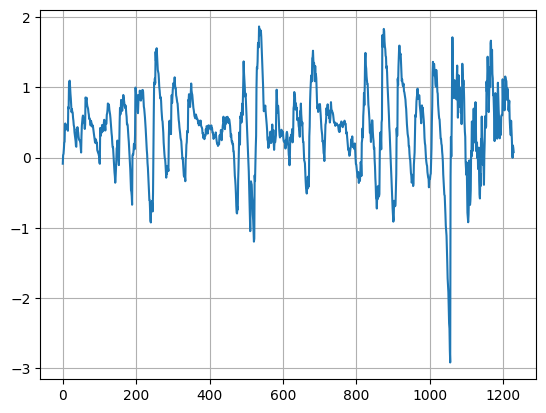

In [207]:
plt.plot(np.cumsum(resid['resid'][:1230]))
plt.grid('on')

In [209]:
resid.iloc[0], resid.iloc[50]

(timestamp    2022-09-16 13:13:59+00:00
 resid                        -0.086575
 Name: 0, dtype: object,
 timestamp    2022-09-17 14:30:23+00:00
 resid                        -0.065387
 Name: 50, dtype: object)

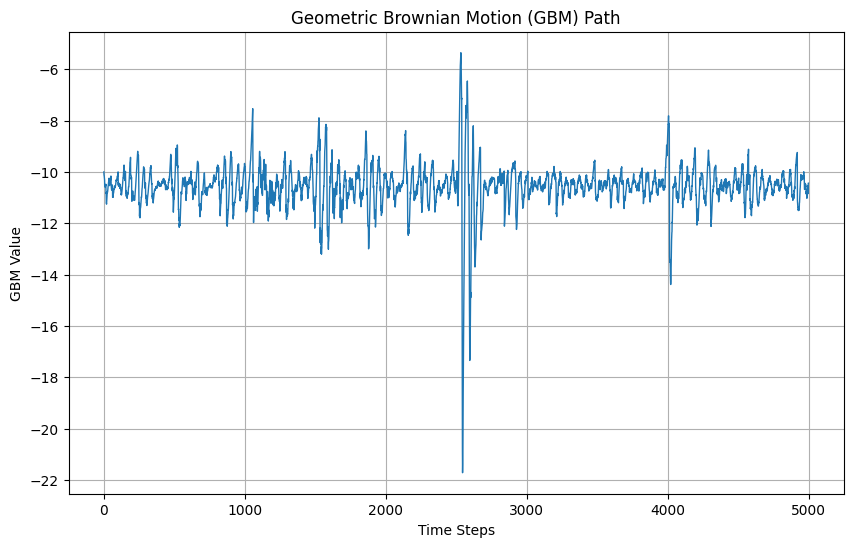

In [203]:

# Initialize the GBM path
gbm_path = [resid['resid'].iloc[0]]  # Starting with the first 'resid' value
gbm_path = [-10]  # Starting with 100 (arbitrary choice)

# Time increment
dt = 1

# Iterate through the DataFrame to generate the GBM path
for index, row in resid.iloc[1:5000].iterrows():  # Start from the second row
    mu = 1/2#row['rolling_var']/2  # sigma^2/2
    sigma =1# np.sqrt(row['rolling_var'])
    S0 = gbm_path[-1]
    
    # Random component
    # Z = np.random.standard_normal()
    
    # Calculate the next point using the GBM formula
    next_point = S0 * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * row['resid']/10)
    gbm_path.append(next_point)

# Plot the GBM path
plt.figure(figsize=(10, 6))
plt.plot(gbm_path, lw=1)
plt.title('Geometric Brownian Motion (GBM) Path')
plt.xlabel('Time Steps')
plt.ylabel('GBM Value')
plt.grid(True)
plt.show()
